# Convolutional Neural Network - CNN

##Objetivo:

Treinar uma Convolutional Neural Network - CNN, para fazer a classificação de imagens

### Parte1 -  Analisando o conjunto de dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

## Banco de dados

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

170508288/170498071 [==============================] - 3s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


## Data Visualization

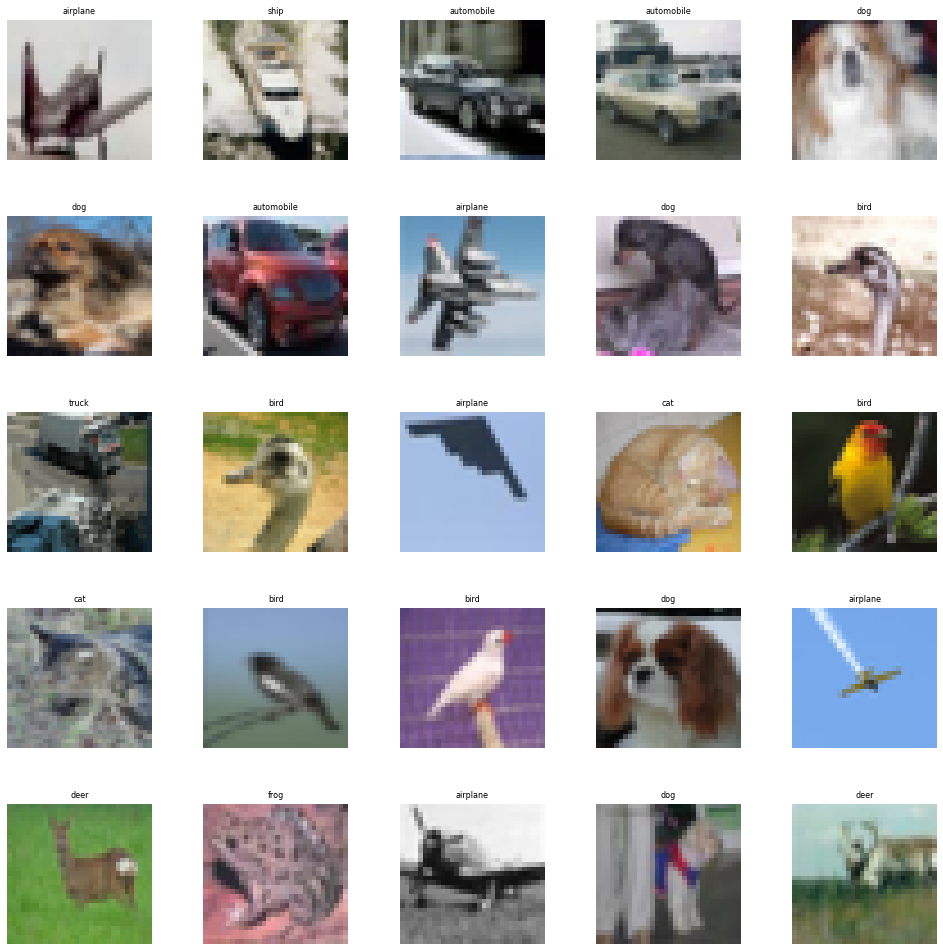

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

 
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() 
n_train = len(X_train) 

for i in np.arange(0, W_grid * L_grid):  

    index = np.random.randint(0, n_train)
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Distribuicao das Classes - Treinamento')

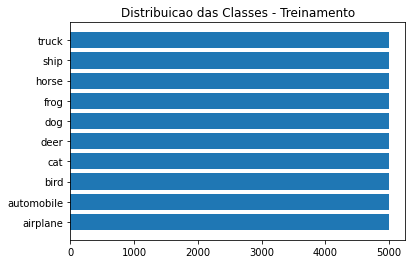

In [ ]:

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(labels, counts)
plt.title('Distribuicao das Classes - Treinamento')

Text(0.5, 1.0, 'Distribuicao das Classes - Teste')

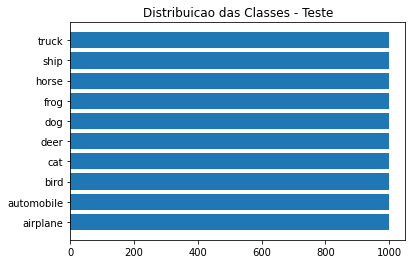

In [ ]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(labels, counts)
plt.title('Distribuicao das Classes - Teste')

## Data Pre-Processing

In [ ]:
n_classes = 10
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255 

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

width, heigth, ch = X_train[0].shape
input_shape = (width, heigth, ch)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

Parte 2 - Contrução do Modelo CNN

In [ ]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

callback = [
    EarlyStopping(monitor='loss', patience=3, mode="auto")
    ]

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
!pip install visualkeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 17.3 MB/s 


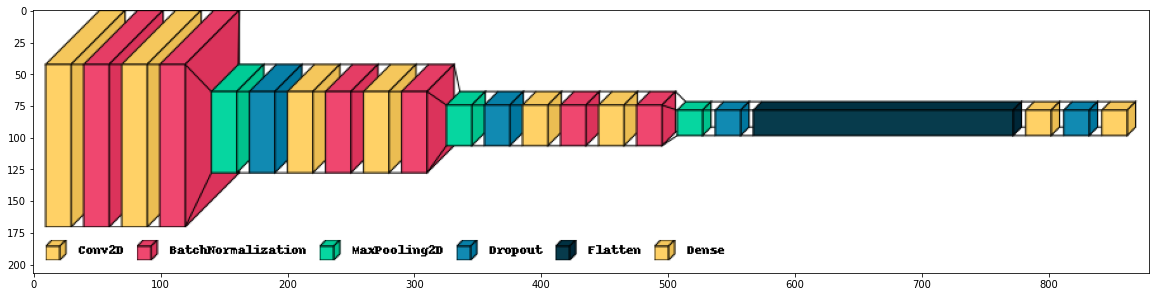

In [ ]:
import visualkeras


plt.figure(figsize=(20,10))
plt.imshow(visualkeras.layered_view(model, legend=True))
plt.show()

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    verbose=1,
    epochs=10,
    callbacks=[callback]  
)

Epoch 1/10
1563/1563 [==============================] - 413s 263ms/step - loss: 1.5145 - accuracy: 0.4586 - val_loss: 1.2605 - val_accuracy: 0.5683
Epoch 2/10
1563/1563 [==============================] - 404s 258ms/step - loss: 1.0678 - accuracy: 0.6262 - val_loss: 0.9452 - val_accuracy: 0.6675
Epoch 3/10
1563/1563 [==============================] - 406s 260ms/step - loss: 0.8911 - accuracy: 0.6907 - val_loss: 0.7501 - val_accuracy: 0.7437
Epoch 4/10
1563/1563 [==============================] - 407s 260ms/step - loss: 0.7869 - accuracy: 0.7301 - val_loss: 0.7488 - val_accuracy: 0.7440
Epoch 5/10
1563/1563 [==============================] - 409s 262ms/step - loss: 0.7152 - accuracy: 0.7573 - val_loss: 1.0104 - val_accuracy: 0.6731
Epoch 6/10
1563/1563 [==============================] - 409s 261ms/step - loss: 0.6534 - accuracy: 0.7770 - val_loss: 0.6694 - val_accuracy: 0.7678
Epoch 7/10
1563/1563 [==============================] - 408s 261ms/step - loss: 0.6053 - accuracy: 0.7929 - val_

## Avaliação do modelo

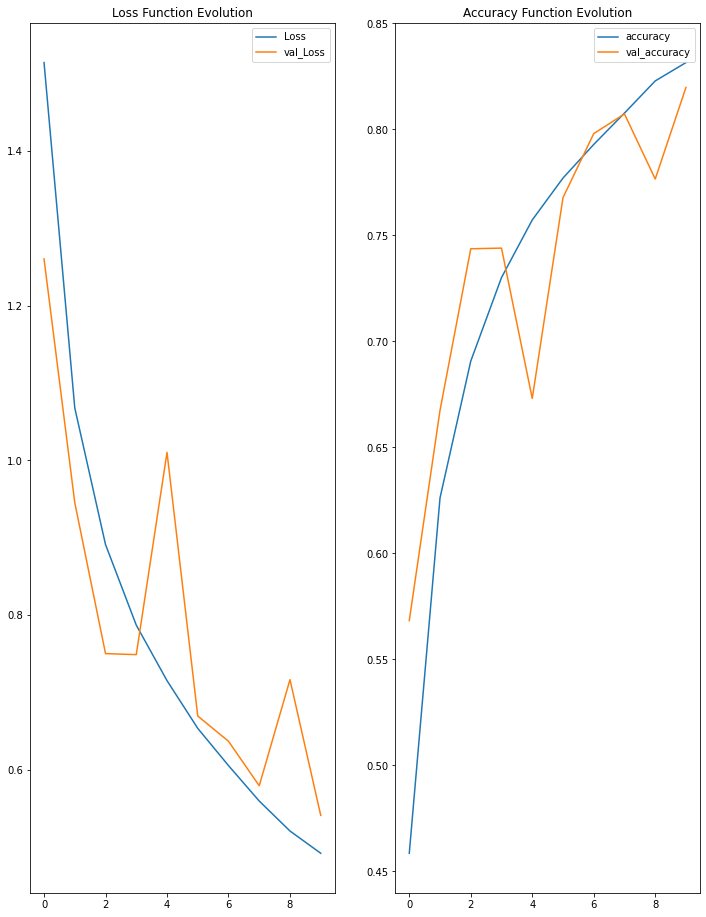

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()


In [ ]:
evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 28s 89ms/step - loss: 0.5409 - accuracy: 0.8198
Test Accuracy : 81.98%


In [ ]:
# Predicoes
pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)

In [ ]:
# X_test = X_test*255

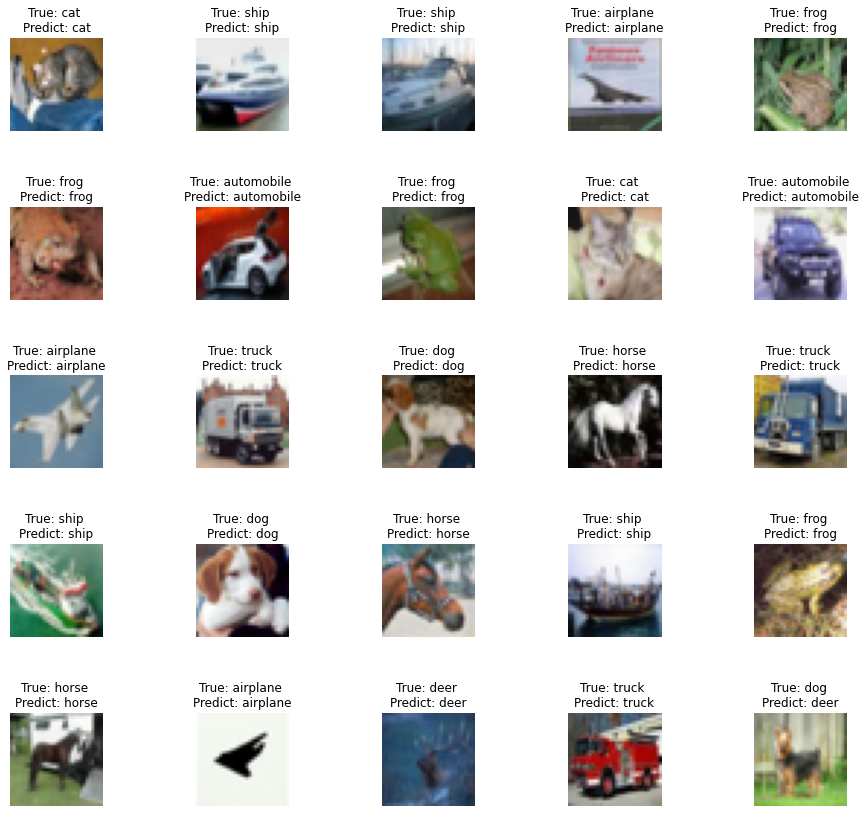

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()


for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[np.argmax(y_test[i])], labels[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
plt.show()

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

8

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(rounded_labels, y_pred)

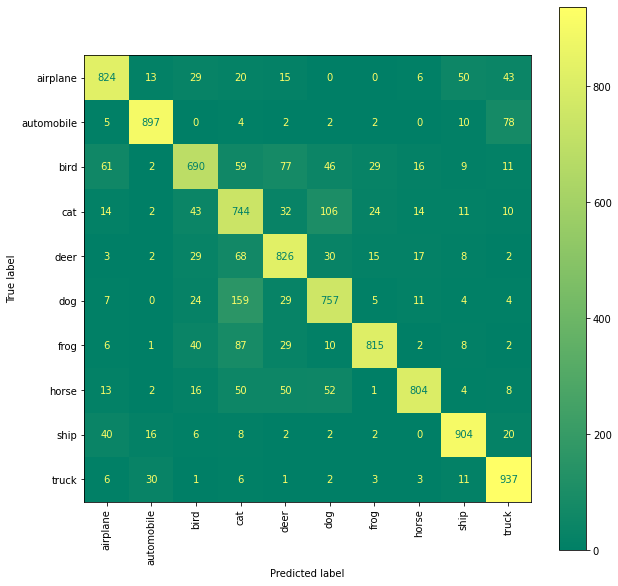

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
print(classification_report(rounded_labels, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.93      0.90      0.91      1000
           2       0.79      0.69      0.73      1000
           3       0.62      0.74      0.67      1000
           4       0.78      0.83      0.80      1000
           5       0.75      0.76      0.75      1000
           6       0.91      0.81      0.86      1000
           7       0.92      0.80      0.86      1000
           8       0.89      0.90      0.90      1000
           9       0.84      0.94      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000

